<a href="https://colab.research.google.com/github/hb21082/CE-8888-LAB/blob/main/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [4]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [5]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [8]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  array_list = []
  mean_of_data = []
  for i in range(n_bootstraps):
    array_list.append(np.random.choice(x, sample_size, True))



  for i  in array_list:
    mean_of_data.append(np.mean(i))

  for j in range(len(mean_of_data)):
    print(mean_of_data[j])
  mean_of_data.sort()
  print(mean_of_data)
  data_mean = np.mean(mean_of_data)
  lower = np.percentile(mean_of_data, 2.5)
  upper = np.percentile(mean_of_data, 97.5)

  #retun the values
  return data_mean, lower, upper
	


Streaming output truncated to the last 5000 lines.
7.357142857142857
9.357142857142858
8.714285714285714
10.5
7.357142857142857
13.642857142857142
8.142857142857142
8.214285714285714
6.285714285714286
11.857142857142858
6.571428571428571
10.357142857142858
10.785714285714286
10.0
7.714285714285714
11.0
12.5
9.571428571428571
12.285714285714286
9.285714285714286
8.428571428571429
9.714285714285714
10.071428571428571
8.071428571428571
11.857142857142858
9.785714285714286
7.642857142857143
8.714285714285714
8.571428571428571
9.571428571428571
10.357142857142858
7.571428571428571
7.857142857142857
12.285714285714286
9.142857142857142
10.714285714285714
12.428571428571429
10.0
8.214285714285714
8.928571428571429
8.785714285714286
7.928571428571429
8.285714285714286
8.714285714285714
7.214285714285714
7.428571428571429
13.142857142857142
11.357142857142858
9.357142857142858
7.285714285714286
6.857142857142857
8.428571428571429
9.928571428571429
8.5
9.071428571428571
8.714285714285714
8.92857

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

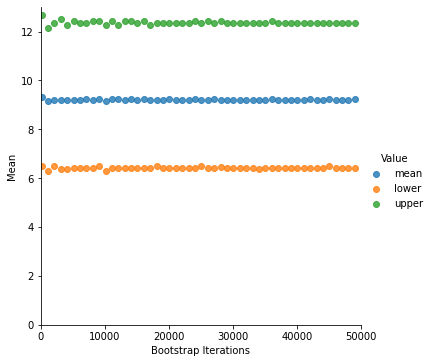

In [9]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [18]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  array_list = []
  mean_of_data = []
  for i in range(n_bootstraps):
    array_list.append(np.random.choice(sample, sample_size, True))



  for i  in array_list:
    mean_of_data.append(np.mean(i))

  for j in range(len(mean_of_data)):
    print(mean_of_data[j])
  mean_of_data.sort()
  print(mean_of_data)
  data_mean = np.mean(mean_of_data)
  lower = np.percentile(mean_of_data, (100-ci)/2)
  upper = np.percentile(mean_of_data, 100-((100-ci)/2))
  #retun the values
  return data_mean, lower, upper

In [19]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


Streaming output truncated to the last 5000 lines.
9.642857142857142
7.142857142857143
7.785714285714286
9.642857142857142
9.357142857142858
8.785714285714286
6.785714285714286
11.785714285714286
8.857142857142858
7.571428571428571
7.285714285714286
9.928571428571429
9.142857142857142
8.642857142857142
7.285714285714286
8.428571428571429
8.357142857142858
10.071428571428571
9.857142857142858
8.785714285714286
9.785714285714286
10.785714285714286
8.214285714285714
9.5
8.142857142857142
7.0
9.714285714285714
10.071428571428571
9.214285714285714
9.642857142857142
11.0
9.5
8.071428571428571
9.142857142857142
9.714285714285714
12.571428571428571
6.928571428571429
6.785714285714286
10.571428571428571
7.857142857142857
8.071428571428571
7.357142857142857
8.642857142857142
11.5
7.285714285714286
9.642857142857142
7.428571428571429
7.857142857142857
7.142857142857143
7.214285714285714
9.714285714285714
10.785714285714286
10.642857142857142
8.642857142857142
9.214285714285714
10.428571428571429


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [23]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
import pandas as pd
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

print(df)






     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]


In [33]:

CF=df.values.T[0][np.logical_not(np.isnan(df.values.T[0]))]
for i in range(0,len(CF)):
  print(CF[i])
# Note: you can add more cells as needed to organise your code and your plots


18.0
15.0
18.0
16.0
17.0
15.0
14.0
14.0
14.0
15.0
15.0
14.0
15.0
14.0
22.0
18.0
21.0
21.0
10.0
10.0
11.0
9.0
28.0
25.0
19.0
16.0
17.0
19.0
18.0
14.0
14.0
14.0
14.0
12.0
13.0
13.0
18.0
22.0
19.0
18.0
23.0
26.0
25.0
20.0
21.0
13.0
14.0
15.0
14.0
17.0
11.0
13.0
12.0
13.0
15.0
13.0
13.0
14.0
22.0
28.0
13.0
14.0
13.0
14.0
15.0
12.0
13.0
13.0
14.0
13.0
12.0
13.0
18.0
16.0
18.0
18.0
23.0
11.0
12.0
13.0
12.0
18.0
21.0
19.0
21.0
15.0
16.0
15.0
11.0
20.0
21.0
19.0
15.0
26.0
25.0
16.0
16.0
18.0
16.0
13.0
14.0
14.0
14.0
28.0
19.0
18.0
15.0
15.0
16.0
15.0
16.0
14.0
17.0
16.0
15.0
18.0
21.0
20.0
13.0
23.0
20.0
23.0
18.0
19.0
25.0
26.0
18.0
16.0
16.0
15.0
22.0
22.0
24.0
23.0
29.0
25.0
20.0
18.0
19.0
18.0
27.0
13.0
17.0
13.0
13.0
13.0
30.0
26.0
18.0
17.0
16.0
15.0
18.0
21.0
19.0
19.0
16.0
16.0
16.0
16.0
25.0
26.0
31.0
34.0
36.0
20.0
19.0
20.0
19.0
21.0
20.0
25.0
21.0
19.0
21.0
21.0
19.0
18.0
19.0
18.0
18.0
18.0
30.0
31.0
23.0
24.0
22.0
20.0
22.0
20.0
21.0
17.0
18.0
17.0
18.0
17.0
16.0
19.0
19.0
36.0
2

In [34]:
NF = df.values.T[1][np.logical_not(np.isnan(df.values.T[1]))]
for i in range(0,len(NF)):
  print(NF[i])


24.0
27.0
27.0
25.0
31.0
35.0
24.0
19.0
28.0
23.0
27.0
20.0
22.0
18.0
20.0
31.0
32.0
31.0
32.0
24.0
26.0
29.0
24.0
24.0
33.0
33.0
32.0
28.0
19.0
32.0
34.0
26.0
30.0
22.0
22.0
33.0
39.0
36.0
28.0
27.0
21.0
24.0
30.0
34.0
32.0
38.0
37.0
30.0
31.0
37.0
32.0
47.0
41.0
45.0
34.0
33.0
24.0
32.0
39.0
35.0
32.0
37.0
38.0
34.0
34.0
32.0
33.0
32.0
25.0
24.0
37.0
31.0
36.0
36.0
34.0
38.0
32.0
38.0
32.0


Text(0.5, 1.0, 'Current Fleet')

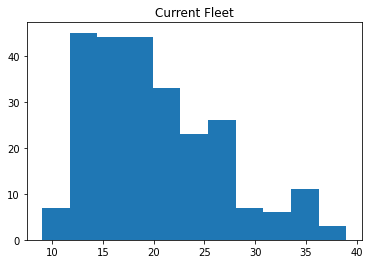

In [28]:
#ploting histogram
import matplotlib.pyplot as plt



plt.hist(CF,bins='auto')
plt.title("Current Fleet")

(array([ 7., 45., 44., 44., 33., 23., 26.,  7.,  6., 11.,  3.]),
 array([ 9.        , 11.72727273, 14.45454545, 17.18181818, 19.90909091,
        22.63636364, 25.36363636, 28.09090909, 30.81818182, 33.54545455,
        36.27272727, 39.        ]),
 <a list of 11 Patch objects>)

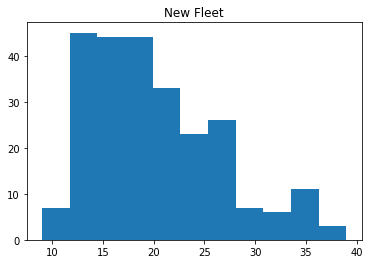

In [29]:
plt.title("New Fleet")
plt.hist(CF,bins='auto')

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

Streaming output truncated to the last 5000 lines.
21.142857142857142
20.714285714285715
18.214285714285715
20.214285714285715
19.5
20.142857142857142
19.142857142857142
17.5
19.428571428571427
18.785714285714285
21.214285714285715
19.0
20.642857142857142
19.0
19.5
22.071428571428573
19.428571428571427
21.928571428571427
22.428571428571427
20.214285714285715
17.071428571428573
19.571428571428573
20.285714285714285
21.071428571428573
19.785714285714285
20.357142857142858
20.285714285714285
21.071428571428573
18.571428571428573
21.857142857142858
22.214285714285715
19.285714285714285
20.5
19.285714285714285
18.785714285714285
21.142857142857142
20.928571428571427
19.214285714285715
18.642857142857142
18.214285714285715
20.071428571428573
22.5
21.642857142857142
18.071428571428573
19.428571428571427
24.357142857142858
20.928571428571427
21.928571428571427
20.857142857142858
21.714285714285715
18.5
19.5
19.571428571428573
19.642857142857142
15.357142857142858
16.285714285714285
20.28571428

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Streaming output truncated to the last 5000 lines.
31.357142857142858
29.714285714285715
31.071428571428573
27.5
31.285714285714285
30.5
30.928571428571427
31.0
29.428571428571427
29.428571428571427
30.0
33.5
31.285714285714285
31.214285714285715
29.142857142857142
31.5
31.285714285714285
29.928571428571427
30.857142857142858
29.857142857142858
32.285714285714285
32.357142857142854
29.142857142857142
29.071428571428573
29.428571428571427
29.214285714285715
26.571428571428573
31.142857142857142
30.857142857142858
31.0
27.714285714285715
29.5
28.571428571428573
31.642857142857142
31.0
28.285714285714285
33.214285714285715
29.428571428571427
29.785714285714285
32.214285714285715
31.285714285714285
28.928571428571427
29.785714285714285
30.071428571428573
29.785714285714285
31.5
31.214285714285715
26.285714285714285
30.785714285714285
30.214285714285715
30.142857142857142
29.5
30.214285714285715
31.714285714285715
27.571428571428573
31.5
26.785714285714285
30.5
29.428571428571427
34.2142857

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

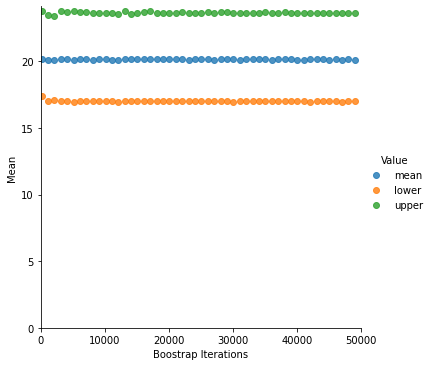

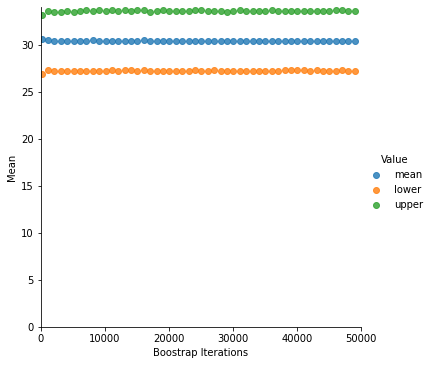

In [36]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(CF, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(NF, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


In [45]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
  mean1= np.mean(sample1)
  mean2= np.mean(sample2)
  obj = mean2 - mean1

  concat = np.concatenate((sample1,sample2))
  score = 0

  for i in range(n_permutations):
    perm = np.random.permutation(concat)
    old = perm[: len(sample1)]
    new= perm[len(sample2) : len(perm)]

    old = np.mean(old)

    new = np.mean(new)

    t_perm = new - old

    if(t_perm > obj):
      score = score +1
  pvalue = score/n_permutations
  return pvalue

In [47]:
print(permut_test(CF,NF,10000))

0.0
